In [22]:
library(ggplot2)
library(dplyr)

---

**Scenario**: A salesman has scheduled two appointments to sell software, one in the morning and another one in the afternoon. There are two software
editions available: the base edition costing Rs. 5000 and the premium edition costing Rs. 10000. His morning appointments typically lead
to a sale with a 30% chance while the afternoon ones typically lead to a sale with a 60% chance independent of what happened in the
morning. If the morning appointment ends up in sale, the salesman has a 70% chance of selling the premium edition and if the afternoon
appointment ends up in a sale, he is equally likely to sell either of the editions. Let X be the random variable representing the total Rupee
value of sales. What are the different values that X can take? Calculate the probability that X takes the value 5000?

---

In [2]:
# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
s_appointment = c(0, 1)

# Appointment success and failure probabilities
p_morning = 0.3 # Success probability of sales in morning
p_afternoon =  0.6 # Success probability of sales in afternoon
p_appointment = matrix(nrow = 2, ncol = 2, c(1-p_morning, p_morning, 1-p_afternoon, p_afternoon), byrow = TRUE)

# Sampling space for software type
s_software = c(5000, 10000)

# Software type probabilities
p_software = matrix(nrow = 2, ncol = 2, c(0.3, 0.7, 0.5, 0.5), byrow = TRUE)

# Function that simulates one trial of the random experiment which is
# what the salesman earns on a random day
salesResult = function(){
  result = numeric(2)
  # Simulate whether sales happen in morning and afternoon appointments
  for (j in c(1:2)){
    result[j] = sample(s_appointment, size = 1, replace = TRUE, prob = p_appointment[j, ])
  }
  earnings = ifelse(result[1] == 1, sample(s_software, size = 1, replace = TRUE, prob = p_software[1, ]), 0) + ifelse(result[2] == 1, sample(s_software, size = 1, replace = TRUE, prob = p_software[2, ]), 0)
  return(earnings)
}

# Number of simulations
nsimulations = 1e5
simulatedData = replicate(nsimulations, salesResult())

# Probability that the salesman earns Rs 5000
mean(simulatedData == 5000)


# Can we calculate all the probabilities in one shot?
table(simulatedData) / nsimulations


[1] 0.24609

simulatedData
      0    5000   10000   15000   20000 
0.28011 0.24609 0.31982 0.09024 0.06374 

In [3]:
simulatedData

[1] 20000  5000     0 10000     0  5000     0     0 10000 15000  5000 10000
    [13] 10000 15000 10000 10000 20000 10000 10000     0 10000 10000     0 20000
    [25] 10000  5000 10000 10000 15000 10000 10000     0  5000     0 10000  5000
    [37]     0     0 10000     0  5000     0 20000 10000     0 10000 10000     0
    [49]     0     0 10000  5000  5000 10000 15000  5000 10000 10000 15000  5000
    [61]  5000     0 15000 10000 10000 10000  5000     0 20000 10000 15000  5000
    [73]     0     0     0     0 10000     0 10000     0  5000     0 10000 10000
    [85]     0     0  5000 10000     0  5000 10000 10000  5000 10000     0     0
    [97] 10000 10000 15000 10000     0 10000 10000 10000     0 10000     0 10000
   [109]     0  5000 20000 10000  5000 10000  5000 15000 20000 10000     0 10000
   [121] 10000     0 20000     0 10000     0     0  5000  5000     0 10000 10000
   [133] 10000  5000     0  5000     0  5000 10000  5000 20000 20000     0  5000
   [145] 10000  5000  5000     0     0     0  5000 10000  5000     0  5000 10000
   [157] 10000 10000     0  5000  5000 10000 10000     0  5000  5000     0  5000
   [169] 10000 10000     0 10000 10000     0 15000 10000  5000 10000 10000  5000
   [181] 20000  5000     0 10000 15000     0 20000  5000 10000     0     0  5000
   [193]  5000     0  5000 20000     0 10000 10000     0 10000  5000 10000     0
   [205] 20000     0  5000     0 10000 15000 10000 10000  5000 20000  5000     0
   [217]     0 10000  5000 10000 15000 15000  5000     0  5000     0 10000     0
   [229]  5000 10000 10000  5000 10000  5000     0  5000 10000 20000 15000 15000
   [241] 10000  5000 10000 10000     0 10000 10000  5000  5000 10000  5000     0
   [253] 20000  5000     0  5000 10000  5000  5000 10000  5000 10000 15000     0
   [265]     0  5000 15000 10000  5000 20000     0     0     0 10000 20000 10000
   [277] 10000     0     0     0 10000 10000 10000 10000     0  5000 15000 10000
   [289] 10000 20000     0 10000 10000 15000     0 20000 10000 10000     0     0
   [301]  5000 15000  5000     0  5000 15000 10000  5000     0 10000 10000     0
   [313] 15000  5000     0 10000 10000     0 10000 10000     0 10000  5000     0
   [325] 10000  5000 10000 10000  5000  5000 10000     0 10000 10000 10000 10000
   [337]  5000 10000  5000 10000     0 10000 10000     0  5000 10000 10000 15000
   [349]     0 10000  5000 20000 20000 10000     0     0     0  5000 10000     0
   [361] 10000  5000  5000 15000 10000     0 10000 10000 10000     0     0 15000
   [373]     0 20000 10000 10000 10000  5000 20000 20000 20000  5000     0 10000
   [385] 10000  5000 10000 10000 10000     0     0     0  5000 10000     0     0
   [397] 10000 10000     0 10000 10000     0 10000  5000     0 10000     0 10000
   [409]     0     0 10000 10000 10000 10000  5000 10000 10000  5000 10000     0
   [421]     0 10000  5000     0  5000 10000     0 10000     0 15000  5000     0
   [433]     0 10000 10000  5000 15000     0 15000  5000 10000 20000  5000  5000
   [445] 15000  5000 10000 15000 10000 15000     0 15000 10000     0  5000     0
   [457] 10000 10000 15000  5000     0  5000 15000     0  5000  5000 10000 10000
   [469]  5000     0  5000     0     0  5000  5000     0 15000 10000     0 15000
   [481] 10000 20000  5000     0  5000     0 10000 10000  5000 10000  5000  5000
   [493] 10000     0  5000 10000     0     0     0  5000     0 10000  5000 15000
   [505] 15000 10000     0 10000     0  5000  5000  5000     0  5000 10000  5000
   [517]  5000 20000     0 20000  5000     0 15000 10000  5000  5000 10000 10000
   [529]     0 20000 10000 10000  5000  5000  5000  5000 10000  5000 15000     0
   [541] 10000  5000  5000 10000 15000 10000 10000 15000 10000     0 20000     0
   [553] 10000 15000 10000     0  5000     0 20000  5000     0     0  5000 10000
   [565] 10000     0 10000 20000  5000  5000  5000  5000 10000 10000  5000  5000
   [577]     0  5000  5000 10000 10000 10000  5000     0  5000     0 10000 10000
   [589] 10000 10000     0 20000  50

---

**Discrete random variable**: Let ${\color{red}X}$  represent the total earnings from one day which is random; that is, ${\color{red}X}$ is a discrete random variable which can take the values $0, 5000, 10000, 15000, 20000.$ The associated probabilities can be calculated as:

$\begin{align*}P({\color{red}X} = 0)  &= 0.7\times0.4 = 0.28,\\ P({\color{red}X} = 5000) &= 0.3\times0.3\times0.4+0.7\times0.6\times0.5=0.246,\\ P({\color{red}X} = 10000) &= 0.3\times0.3\times0.6\times0.5+0.3\times0.7\times0.4+0.7\times0.6\times0.5=0.321,\\ P({\color{red}X} = 15000) &= 0.3\times0.3\times0.6\times0.5+0.3\times0.7\times0.6\times0.5=0.09,\\ P({\color{red}X} = 20000) &= 0.3\times0.7\times0.4+0.3\times0.6\times0.5 = 0.063.\end{align*}$

---

**Probability Mass Function (PMF)** of the random variable ${\color{red}X}$ is denoted as ${\color{red}{P_X}}(x),$ where $x$ represents the possible values that the random variable ${\color{red}X}$ can take:

$\begin{align*}{\color{red}{P_X}}(0) &= P({\color{red}X} = 0)  = 0.28,\\ {\color{red}{P_X}}(5000) &=P({\color{red}X} = 5000) = 0.246,\\ {\color{red}{P_X}}(10000) &=P({\color{red}X} = 10000) = 0.321,\\ {\color{red}{P_X}}(15000) &=P({\color{red}X} = 15000) = 0.09,\\ {\color{red}{P_X}}(20000) &=P({\color{red}X} = 20000) = 0.063.\end{align*}$

---

---

Plot the frequency of occurences of all possible values of the random variable $\color{red}X$

---

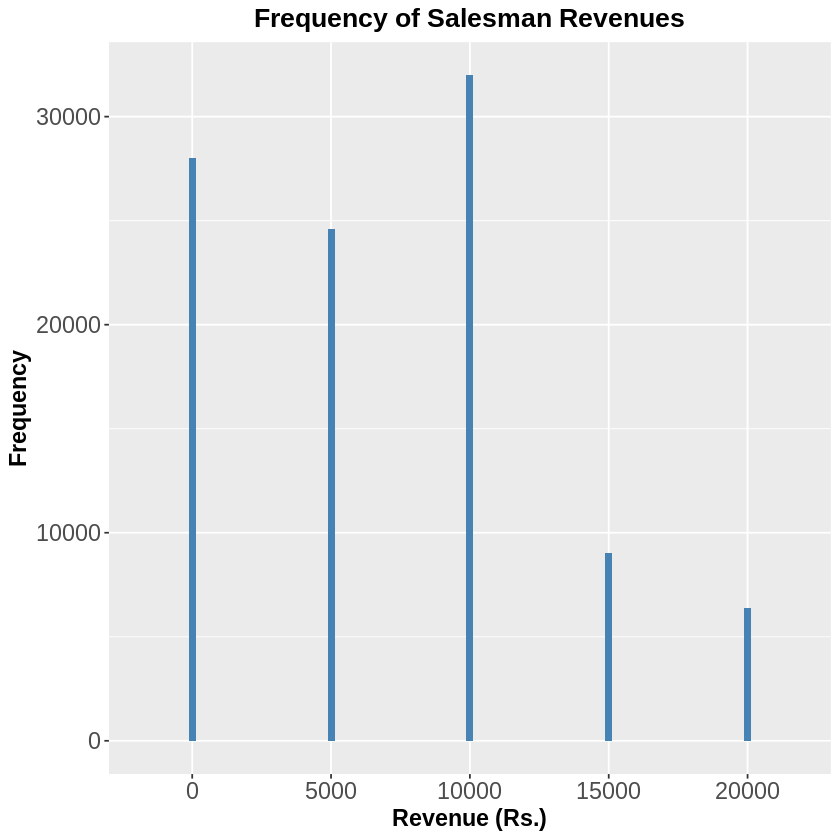

In [4]:
# Convert simulatedData into a dataframe
dfSales = as.data.frame(simulatedData)

# Add names to the columns
colnames(dfSales) = c('Earning')

p = ggplot(data = dfSales)+
geom_bar(aes(x = factor(Earning)), width = 0.05, fill = 'steelblue')+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'Revenue (Rs.)',
       y = 'Frequency',
       title = 'Frequency of Salesman Revenues')
p

---

Plot the PMF of the random variable $\color{red}X$

---

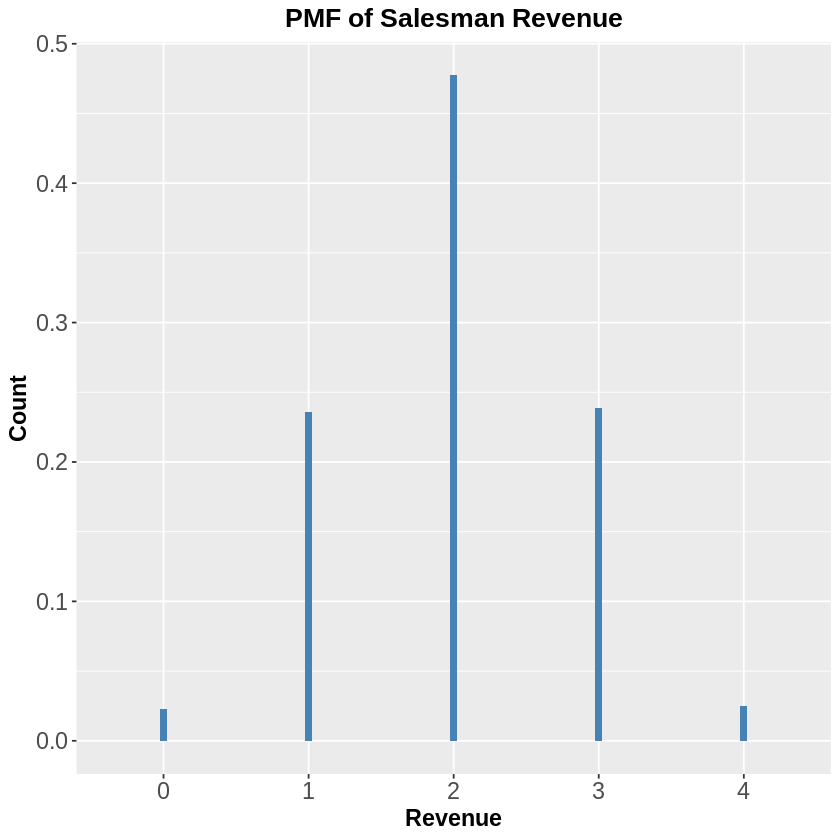

In [59]:
# Convert table of simulatedData into a dataframe
dfSales = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfSales) = c('Earning', 'Frequency')

# Add a new column with proportion (probability) values
dfSales['Probability'] = dfSales['Frequency'] / nsimulations

#head(dfSales, 5)

p = ggplot(data = dfSales)+
geom_col(aes(x = Earning, y = Probability), width = 0.05, fill = 'steelblue')+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'Revenue',
       y = 'Count',
       title = 'PMF of Salesman Revenue')
p


What is the salesman's expected earnings? What does it even mean to say "expected earning?" It is a single number denoted as $E[X]$ and referred to as the *expected value of* $X$ which can be calculated as follows:


---



*   *From a simulation perspective*, it is simply an average of all the simulated earnings:
$\begin{align*}E[X] &\approx \frac{1}{\text{nsimulations}}\times\begin{cases}\text{No. of times 0 appeared}\times0\\\qquad\qquad\quad+\\\text{No. of times 5000 appeared}\times 5000\\\qquad\qquad\quad+\\\text{No. of times 10000 appeared}\times10000\\\qquad\qquad\quad+\\\text{No. of times 15000 appeared}\times15000\\\qquad\qquad\quad+\\\text{No. of times 20000 appeared}\times20000\end{cases}\\&=0\times\underbrace{\frac{\text{No. of times 0 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=0)=P_X(0)}}\\&+5000 \times\underbrace{\frac{\text{No. of times 5000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=5000) = P_X(5000)}}\\&+10000 \times\underbrace{\frac{\text{No. of times 10000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=10000) = P_X(10000)}}\\&+15000 \times\underbrace{\frac{\text{No. of times 15000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=15000)=P_X(15000)}}\\&+20000 \times\underbrace{\frac{\text{No. of times 20000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=20000)=P_X(20000)}}.\end{align*}$


---


*   *From a theoretical perspective*, the expected value of $X$ is defined as the weighted sum of the possible values $X$ can take with the corresponding probabilities as the weights:

$\begin{align*} E[X] &= \sum_xxP_X(x),\ \text{where }x = 0, 5000, 10000, 15000, 20000\\\Rightarrow E[X] &= 0\times P_X(0)+5000\times P_X(5000)+10000\times P_X(10000)+15000\times P_X(15000)+20000\times P_X(20000)\\&=0\times0.28+5000\times0.246+10000\times0.321+15000\times0.09+20000\times0.063 = \text{Rs. }7050.\end{align*}$



---

So, we see that the expected value of $X$ is approximately the long-term average of the simulated (or realized) values of $X.$


In [6]:
# Expected earnings using simulated values
mean(simulatedData) # long term average of the realizations of X

# Expected earnings using the theoretical definition
x = c(0, 5000, 10000, 15000, 20000)
p = c(0.28, 0.246, 0.321, 0.09, 0.063)
sum(x * p)

[1] 7057.05

[1] 7050

How much could the salesman's earnings vary from the expected value of the earning calculated in the previous cell?


---


To answer this question, let's first look at the quantity $X-E[X] = X-7050.$ Note that:


*   this is also a random variable with the possible values $0-7050, 5000-7050, 10000-7050, 15000-7050, 20000-7050$;
*   it can be thought of as the random variable that captures the deviation of $X$ from its expected value;
*  the associated probabilities are still the same as:
\begin{array}{c|c|c}
\hline
\color{red}X&\color{red}{X}-\color{cyan}{E[X]} = \color{red}{X}-\color{cyan}{7050}&\color{magenta}{\text{Probability}}\\
\hline
0 & -7050& 0.28\\
5000 & -2050 & 0.246\\
10000 & 2950 & 0.321\\
15000 & 7950 & 0.09\\
20000 0& 12950 & 0.063
\end{array}
---
Now, consider the quantity $(X-E[X])^2 = (X-7050)^2.$ Note that:


*   this is also a random variable with the possible values $(0-7050)^2, (5000-7050)^2, (10000-7050)^2, (15000-7050)^2, (20000-7050)^2$;
*   it can be thought of as the random variable that captures the squared deviation of $X$ from its expected value;
*  the associated probabilities are still the same as:
\begin{array}{c|c|c}
\hline
\color{red}X&(\color{red}{X}-\color{cyan}{E[X]})^2 = (\color{red}{X}-\color{cyan}{7050})^2&\color{magenta}{\text{Probability}}\\
\hline
0 & (-7050)^2 & 0.28\\
5000 & (-2050)^2 & 0.246\\
10000 & (2950)^2 & 0.321\\
15000 & (7950)^2& 0.09\\
20000 & (12950)^2 & 0.063
\end{array}

---

$\color{green}{Variance}$ of the random variable $X,$ denoted as $\text{var}[X],$ is the expected squared deviation of $X$ from its expected value. In simple terms, variance of $X$ is the expected value of the random variable $(X-E[X])^2.$

$\begin{align*}\text{Var}[X] &= E\left[\underbrace{(X-E[X])^2}_{\text{squared deviation random variable}}\right]\\&=
\sum_x (x-E[X])^2\times P_X(x)\\& = (0-7050)^2\times P_X(0)+(5000-7050)^2\times P_X(5000)+(10000-7050)^2\times P_X(10000)+(15000-7050)^2\times P_X(15000)+(20000-7050)^2\times P_X(20000)\\&=(0-7050)^2\times 0.28+(5000-7050)^2\times 0.246+(10000-7050)^2\times 0.321+(15000-7050)^2\times 0.09+(20000-7050)^2\times 0.063\\&=309375\ \text{Rupees squared}.\end{align*}$

---

$\color{green}{Standard\ deviation}$ of the random variable $X,$ denoted as $\text{SD}[X],$ is defined as the square root of its variance:

$\begin{align*}\text{SD}[X] &= \sqrt{\text{Var}[X]} = \sqrt{E\left[(X-E[X])^2\right]}\\&=\sqrt{(0-7050)^2\times 0.28+(5000-7050)^2\times 0.246+(10000-7050)^2\times 0.321+(15000-7050)^2\times 0.09+(20000-7050)^2\times 0.063}\\&\approx \text{Rs. 5830.7}.\end{align*}$

---

In [7]:
# Simulated earnings of the salesman
simulatedData

[1] 20000  5000     0 10000     0  5000     0     0 10000 15000  5000 10000
    [13] 10000 15000 10000 10000 20000 10000 10000     0 10000 10000     0 20000
    [25] 10000  5000 10000 10000 15000 10000 10000     0  5000     0 10000  5000
    [37]     0     0 10000     0  5000     0 20000 10000     0 10000 10000     0
    [49]     0     0 10000  5000  5000 10000 15000  5000 10000 10000 15000  5000
    [61]  5000     0 15000 10000 10000 10000  5000     0 20000 10000 15000  5000
    [73]     0     0     0     0 10000     0 10000     0  5000     0 10000 10000
    [85]     0     0  5000 10000     0  5000 10000 10000  5000 10000     0     0
    [97] 10000 10000 15000 10000     0 10000 10000 10000     0 10000     0 10000
   [109]     0  5000 20000 10000  5000 10000  5000 15000 20000 10000     0 10000
   [121] 10000     0 20000     0 10000     0     0  5000  5000     0 10000 10000
   [133] 10000  5000     0  5000     0  5000 10000  5000 20000 20000     0  5000
   [145] 10000  5000  5000     0     0     0  5000 10000  5000     0  5000 10000
   [157] 10000 10000     0  5000  5000 10000 10000     0  5000  5000     0  5000
   [169] 10000 10000     0 10000 10000     0 15000 10000  5000 10000 10000  5000
   [181] 20000  5000     0 10000 15000     0 20000  5000 10000     0     0  5000
   [193]  5000     0  5000 20000     0 10000 10000     0 10000  5000 10000     0
   [205] 20000     0  5000     0 10000 15000 10000 10000  5000 20000  5000     0
   [217]     0 10000  5000 10000 15000 15000  5000     0  5000     0 10000     0
   [229]  5000 10000 10000  5000 10000  5000     0  5000 10000 20000 15000 15000
   [241] 10000  5000 10000 10000     0 10000 10000  5000  5000 10000  5000     0
   [253] 20000  5000     0  5000 10000  5000  5000 10000  5000 10000 15000     0
   [265]     0  5000 15000 10000  5000 20000     0     0     0 10000 20000 10000
   [277] 10000     0     0     0 10000 10000 10000 10000     0  5000 15000 10000
   [289] 10000 20000     0 10000 10000 15000     0 20000 10000 10000     0     0
   [301]  5000 15000  5000     0  5000 15000 10000  5000     0 10000 10000     0
   [313] 15000  5000     0 10000 10000     0 10000 10000     0 10000  5000     0
   [325] 10000  5000 10000 10000  5000  5000 10000     0 10000 10000 10000 10000
   [337]  5000 10000  5000 10000     0 10000 10000     0  5000 10000 10000 15000
   [349]     0 10000  5000 20000 20000 10000     0     0     0  5000 10000     0
   [361] 10000  5000  5000 15000 10000     0 10000 10000 10000     0     0 15000
   [373]     0 20000 10000 10000 10000  5000 20000 20000 20000  5000     0 10000
   [385] 10000  5000 10000 10000 10000     0     0     0  5000 10000     0     0
   [397] 10000 10000     0 10000 10000     0 10000  5000     0 10000     0 10000
   [409]     0     0 10000 10000 10000 10000  5000 10000 10000  5000 10000     0
   [421]     0 10000  5000     0  5000 10000     0 10000     0 15000  5000     0
   [433]     0 10000 10000  5000 15000     0 15000  5000 10000 20000  5000  5000
   [445] 15000  5000 10000 15000 10000 15000     0 15000 10000     0  5000     0
   [457] 10000 10000 15000  5000     0  5000 15000     0  5000  5000 10000 10000
   [469]  5000     0  5000     0     0  5000  5000     0 15000 10000     0 15000
   [481] 10000 20000  5000     0  5000     0 10000 10000  5000 10000  5000  5000
   [493] 10000     0  5000 10000     0     0     0  5000     0 10000  5000 15000
   [505] 15000 10000     0 10000     0  5000  5000  5000     0  5000 10000  5000
   [517]  5000 20000     0 20000  5000     0 15000 10000  5000  5000 10000 10000
   [529]     0 20000 10000 10000  5000  5000  5000  5000 10000  5000 15000     0
   [541] 10000  5000  5000 10000 15000 10000 10000 15000 10000     0 20000     0
   [553] 10000 15000 10000     0  5000     0 20000  5000     0     0  5000 10000
   [565] 10000     0 10000 20000  5000  5000  5000  5000 10000 10000  5000  5000
   [577]     0  5000  5000 10000 10000 10000  5000     0  5000     0 10000 10000
   [589] 10000 10000     0 20000  50

In [8]:
# Sample mean
mean(simulatedData) # sample mean

print('---------')

# Sample variance of the earnings using simulated values
#simulatedData - mean(simulatedData) # sample deviations vector
#(simulatedData - mean(simulatedData))^2 # sample squared deviations vector
mean((simulatedData - mean(simulatedData))^2) # sample variance calculated using simulation
var(simulatedData) # in-built function for variance

print('---------')

# Standard deviation of the earnings using simulated values
sqrt(mean((simulatedData - mean(simulatedData))^2))
sd(simulatedData) # in-built function for standard deviation

print('---------')

# Variance of the earnings using the theoretical definition
x = c(0, 5000, 10000, 15000, 20000)
p = c(0.28, 0.246, 0.321, 0.09, 0.063)
# sum(p*x) # mean or expected value of the random variable
# x - sum(x*p) # deviations random variable
# (x - sum(x*p))^2 # squared deviations randon variable
sum((x - sum(x*p))^2 * p) # variance of the random variable

print('---------')

# Standard deviation of the earnings using the theoretical definition
sqrt(sum((x - sum(x*p))^2 * p))

[1] 7057.05

[1] "---------"


[1] 34132295

[1] 34132637

[1] "---------"


[1] 5842.285

[1] 5842.314

[1] "---------"


[1] 33997500

[1] "---------"


[1] 5830.738

---

$ X = \text{heart rate of a random patient}$, which is a random variable. We will assume that the heart rates are symmetrically distributed around 74 BPM, and simulate the heart rates of 100 patients. Once we simulate (or realize or collect) the heart rates of a certain number of patients, then we have the heart rate vector $\mathbf{x}$ which can be used as a proxy for understanding the heart rate of a random patient from the population.

In [9]:
nsimulations = 100
simulatedData = rnorm(nsimulations, mean = 74, sd = 6)
print(simulatedData)

# Expected value of heart rates (BPM)
mean(simulatedData)

# Variance of heart rates (BPM^2)
mean((simulatedData - mean(simulatedData))^2)

# Standard deviation of hear rates (BPM)
sqrt(mean((simulatedData - mean(simulatedData))^2))

  [1] 72.73565 77.10917 85.00536 80.76118 74.39606 64.46203 68.61069 81.11237
  [9] 62.09726 74.20054 72.77599 72.35493 82.29864 72.96182 86.32551 85.01273
 [17] 61.35004 75.18932 64.99590 68.00313 72.05450 75.27612 71.74735 72.79133
 [25] 76.53188 74.32326 74.44428 81.30354 72.91211 66.34887 74.89930 70.67298
 [33] 71.27795 79.11638 64.73322 67.98339 66.13161 80.50707 74.77330 68.13467
 [41] 78.26426 83.35572 78.94476 68.47713 70.55660 67.89989 68.17142 70.21008
 [49] 82.08996 69.02784 66.82509 75.03977 67.82151 79.05184 79.24010 66.58202
 [57] 71.44606 78.76068 72.14899 74.49286 74.07322 68.54375 78.13376 70.89593
 [65] 70.89479 69.17993 72.10127 74.50107 77.45884 73.90070 76.65911 81.97375
 [73] 68.51604 86.23924 77.03517 72.11323 74.70547 69.73950 78.15180 76.89552
 [81] 66.30900 69.29003 75.72592 80.70553 71.60538 71.60246 67.17320 73.98183
 [89] 60.10736 76.37492 75.58055 79.29999 85.72299 80.57248 68.31655 72.17658
 [97] 69.25863 78.42909 76.08213 76.59097


[1] 73.72746

[1] 32.26088

[1] 5.679867

---

Component plot of the simulated heart rates

---

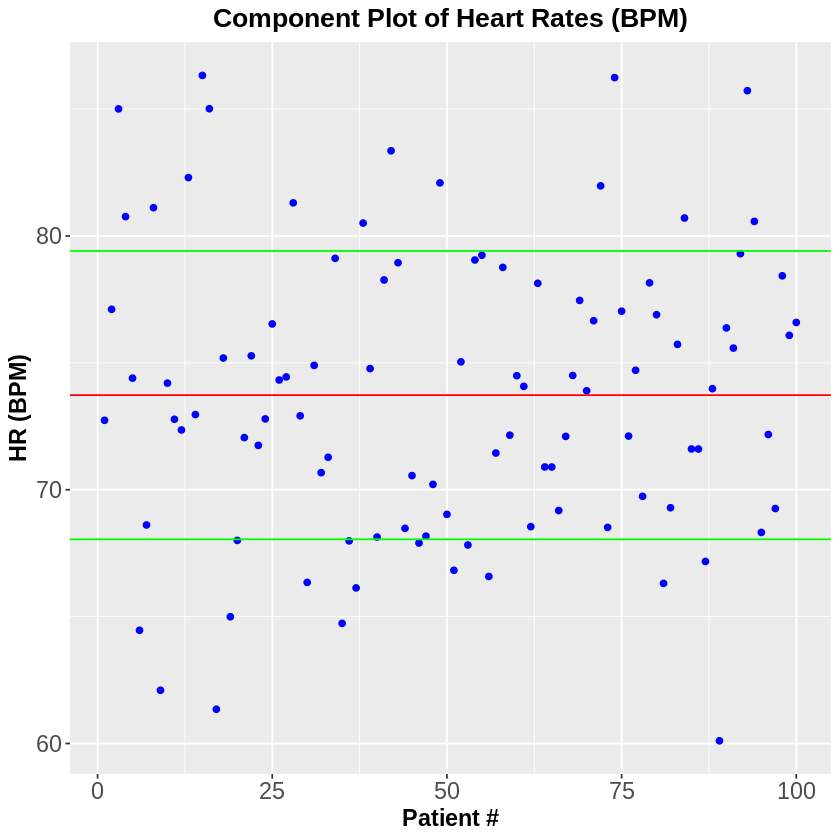

In [10]:
dfPatient = as.data.frame(simulatedData)
colnames(dfPatient) = c('HR')
#head(dfPatient)
# Component plot of the simulated values (which can be seen as a vector)
p = ggplot(data = dfPatient) +
  geom_point(aes(x = 1:nrow(dfPatient), y = HR), color = 'blue') +
  labs( x = 'Patient #', y = 'HR (BPM)') +
  geom_hline(yintercept = mean(simulatedData), color = 'red') +
  geom_hline(yintercept = mean(simulatedData) + sqrt(mean((simulatedData - mean(simulatedData))^2)), color = 'green') +
  geom_hline(yintercept = mean(simulatedData) - sqrt(mean((simulatedData - mean(simulatedData))^2)), color = 'green') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'Patient #',
       y = 'HR (BPM)',
       title = 'Component Plot of Heart Rates (BPM)')
p

---


$\color{orange}{Binomial\ Experiment}$

**Scenario**: a box has 10 balls of which 4 are white and 6 are black balls. We randomly draw 5 balls $\color{green}{with\ replacement}.$ We are interested in the probability that 3 of the 5 drawn balls are white. This is the $\color{green}{binomial\ experiment}$.

Let $X$ be the random variable that represents the number of white balls drawn. Note the two parameters of the experiment:

1. the number of trails or the sample size $n=5$
2. the success proportion in the sample $p=\text{no. of white balls}/\text{total no. of balls} = 4/10.$

We denote the random variable as $$X\sim\text{Bin}(n=5, p = 4/10),$$

and we are interested in $P(X = 3).$

**Probability mass function (PMF)**: $$\begin{align*}P_X(j)&= P(X = j) =nC_j\times p^j\times(1-p)^{n-j}\\\Rightarrow P_X(3) =& P(X = 3) = 5C_3\times (4/10)^3\times(1-4/10)^{5-3}.\end{align*}$$

What is the probability that we will get at most 3 white balls?

**Cumulative distribution function (CDF)**: $$\begin{align*}F_X(j) &= P(X\leq j)\\\Rightarrow F_X(3) &= P(X\leq 3) = P(X=0) + P(X=1)+ P(X=2) + P(X=3).\end{align*}$$

What is the probability that we will get at least 3 white balls?

$$P(X >= 3) = 1 - P(X < 3) = 1 - P(X\leq2).$$

---

In [11]:
## Calculating the binomial probabilities directly using the functions
## dbinom() and pbinom()
n = 5
p = 4/10
j = 3
dbinom(j, n, p) # P(X = j) where X~Bin(n, p)
dbinom(0, n, p) + dbinom(1, n, p) + dbinom(2, n, p)  + + dbinom(2, n, p) # P(X <= 3)
sum(dbinom(0:j, n, p)) # same as above P(X <= 3)
pbinom(j, n, p) # P(X <= j)
1 - pbinom(2, n, p)  # P(X >= 3) = 1 - P(X < 3) = 1 - P(X <= 2)

[1] 0.2304

[1] 1.02816

[1] 0.91296

[1] 0.91296

[1] 0.31744

In [12]:
## Calculating the binomial probabilities using simulation with rbinom() function
nsimulations = 1e5
simulatedData = rbinom(nsimulations, n, p) # simulating a binomial random variable
mean(simulatedData == 3) # simulated probability that X = 3
dbinom(3, n, p) # theoretical probability that X = 3
print('-----');
mean(simulatedData <= 2) # simulated probability that X <= 2
pbinom(2, n, p) # theoretical probability that X <= 2
print('-----');
mean(simulatedData > 2) # simulated probability that X > 2
1 - pbinom(2, n, p) # theoretical probability that X > 2

[1] 0.23051

[1] 0.2304

[1] "-----"


[1] 0.68199

[1] 0.68256

[1] "-----"


[1] 0.31801

[1] 0.31744

---
$\color{red}{\textbf{Complete this}}$

Simulating a binomial random variable and plotting its PDF and CDF using the simulated values

---

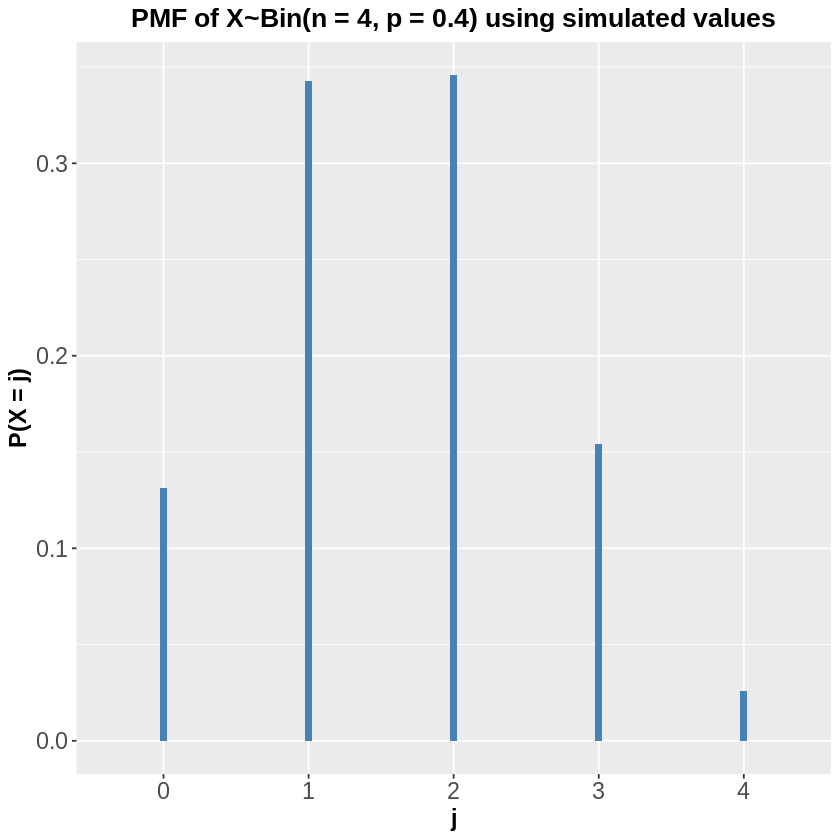

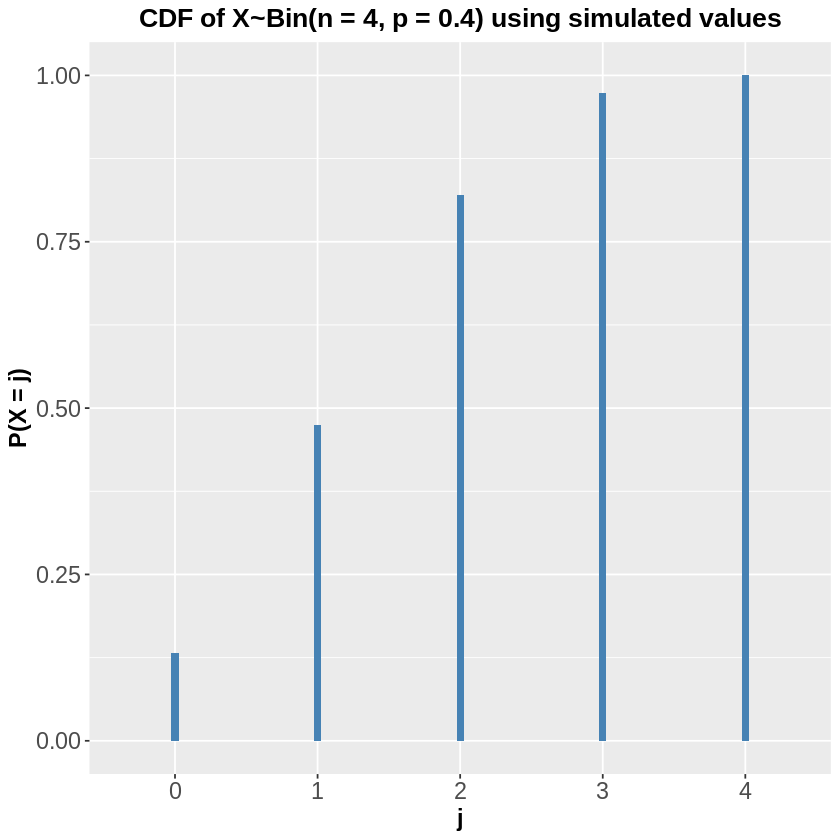

In [35]:
# Simulating a binomial random variable
n = 4
p = 0.4
nsimulations = 1e5
simulatedData = rbinom(nsimulations, n, p)

# Convert simulatedData into a dataframe
dfBinom = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfBinom) = c('Values', 'Frequency')

# Add a new column with proportion (probability) values
dfBinom['Probability'] = dfBinom['Frequency'] / nsimulations

# Add a new column with the cumulative probabilities
dfBinom['Cumprob'] = cumsum(dfBinom['Probability'])

# Plot the PMF of the binomial random variable using the simulated values
p = ggplot(data = dfBinom) +
  geom_bar(aes(x = Values, y = Probability), stat = "identity", width = 0.05, fill = 'steelblue') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 14, face = "bold")) +
  labs(x = 'j',
       y = 'P(X = j)',
       title = 'PMF of X~Bin(n = 4, p = 0.4) using simulated values')
p

# Plot the CDF of the binomial random variable using the simulated values
p = ggplot(data = dfBinom) +
  geom_bar(aes(x = Values, y = Cumprob), stat = "identity", width = 0.05, fill = 'steelblue') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 14, face = "bold")) +
  labs(x = 'j',
       y = 'P(X = j)',
       title = 'CDF of X~Bin(n = 4, p = 0.4) using simulated values')
p


---

$\color{red}{\textbf{Complete this}}$

**Scenario**: the $\color{green}{binomial\ experiment}$ explained above can be abstracted as a box containing 6 white balls and 4 black balls such that we sample $\color{green}{with\ replacement}$ one ball from the box and repeat it 4 times. Here we calculate the probability that we get 3 white balls by simulating this random experiment.

---


In [36]:
# A demo of the grepl() function
data = c('w1', 'w2', 'b1', 'b2')
sum(grepl('w.*', data))

[1] 2

In [37]:
## Sampling space
s = c('w1', 'w2', 'w3', 'w4', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6')

## Probability for sampling an element from the sampling space
p = (1/length(s))* replicate(length(s), 1)

## Simulate the random experiment of drawing 4 balls from 10 balls with
## replacement
nsimulations = 1e1
samplesize = 5
simulatedData = replicate(nsimulations, sample(s, size = samplesize, replace = TRUE, prob = p))

## Check event if 3 of the 5 drawn balls are white
checkEvent = function(data){
  if (sum(grepl('w.*', data)) == 3){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
## Calculate the probability that 3 of the 5 drawn balls are white
mean(apply(simulatedData, 2, checkEvent))

## Calculate probability that 3 of the 5 drawn balls are white using dbinom()
dbinom(3, 5, 4/10) # P(X = 3) when X~Bin(n = 5, p = 0.4)

[1] 0.2

[1] 0.2304

In [38]:
simulatedData

b2,b2,b3,b6,w4,b5,w2,b3,w2,b6
w2,w1,b4,b1,b1,b3,w1,b1,w1,b4
w1,b2,w2,b5,b3,b1,b5,b2,w1,w3
w3,b1,w2,w2,b3,b3,w1,w1,b6,b3
b1,b6,b3,w1,b3,b1,b6,w3,w1,w1


---

$\color{red}{\textbf{Complete this}}$

**Scenario**: the $\color{green}{binomial\ experiment}$ explained above can be abstracted as a box containing a white and black ball such that we sample $\color{green}{with\ replacement}$ one ball from the box and repeat it 4 times. Here, the probability of drawing a white ball is 4/10 and probability of drawing a black ball is 6/10.

---


In [39]:
## Sampling space
s = c('w', 'b')

## Probability for sampling an element from the sampling space
p = c(4/10, 6/10)

## Simulate the random experiment of drawing 4 balls from 10 balls with
## replacement
nsimulations = 1e5
samplesize = 4
simulatedData = replicate(nsimulations, sample(s, size = samplesize, replace = TRUE, prob = p))

# Check event if 3 of the 5 drawn balls are white
checkEvent = function(data){
  if (sum(data == 'w') == 3){
    return(1)
  }
  else{
    return(0)
  }
}

## Calculate the probability that 3 of the 5 drawn balls are white
mean(apply(simulatedData, 2, checkEvent))

[1] 0.15373

$\color{red}{\textbf{Complete this}}$

---

**Example:** an oil company has a $20\%$ chance of striking oil when drilling a well. What is the probability the company will strike oil 3 times in 7 drilling attempts?

$$X\sim\text{Bin}(n = ?, p = 0.?)$$

and we are interested in $P(X = ?).$

---

In [40]:
dbinom(3, 7, 0.2)  # P(X = 3) when X ~ Bin(n = 7, p = 0.2)

[1] 0.114688

$\color{red}{\textbf{Complete this}}$

---

**Example**: approximately 42% of people have type O blood. On a given day in a blood bank, 120 people arrive to donate blood. What is the probability that 30 of those 120 people have type O blood?

$$X\sim\text{Bin}(n = ?, p = ?),$$

We want $P(X=\,?).$

---

In [41]:
dbinom(30, 120, 0.42)  # P(X = 30) when X ~ Bin(n = 120, p = 0.42)

[1] 4.323108e-05

$\color{red}{\textbf{Complete this}}$

---

**Example**: A certain stoplight, when coming from the North, is green approximately 31% of
the time. Over the next few days, someone comes to this light 8 times from the
North. We are interested in the probability that the person will come across green light 5 times.

$$X\sim\text{Bin}(n = ?, p = ?).$$

We want $P(X=\,?).$

---

In [42]:
dbinom(5, 8, 0.31)  # P(X = 5) when X ~ Bin(n = 8, p = 0.31)

[1] 0.05266763

$\color{red}{\textbf{Complete this}}$

---

**Example**: A certain stoplight, when coming from the North, is green approximately 31% of
the time. Over the next few days, someone comes to this light 8 times from the
North. We are interested in the probability that the person will come across green light at least 5 times.

$$X\sim\text{Bin}(n = ?, p = ?).$$

We want $P(X\geq\,?).$

---

In [43]:
1-pbinom(4, 8, 0.31)

[1] 0.06610275

$\color{red}{\textbf{Complete this}}$

---

**Example**: A certain stoplight, when coming from the North, is green approximately 31% of
the time. Over the next few days, someone comes to this light 8 times from the
North. We are interested in the probability that the person will come across green light at most 5 times.

$$X\sim\text{Bin}(n = ?, p = ?).$$

We want $P(X\leq\,?).$

---

In [44]:
pbinom(5, 8, 0.31)

[1] 0.9865649

$\color{red}{\textbf{Complete this}}$

---

**Example**: It is known that diskettes produced by a certain company will be defective with probability .01, independently of each other. The company sells the diskettes in packages of size 10 and offers a money-back guarantee that at most 1 of the 10 diskettes in the package will be defective. The guarantee is that the customer can return the entire package of diskettes if he or she finds more than one defective diskette in it. If someone buys 3 packages, what is the probability that he or she will return exactly 1 of them?

Let $X$ be the number of packages that are returned.

$$X \sim\text{Bin}(n = 3, p_X =\ ?),$$

and we want $P(X =\,?).$

The number of defective items in a package:

$$Z \sim\text{Bin}(n = ?, p_Z = ?).$$

$$p_X = P(Z >\,?) = 1-P(Z <=\,?).$$

---

In [45]:
# Step 1: Calculate P(Z > 1)
pZ = 0.01
nZ = 10
pZ_leq_1 = pbinom(1, nZ, pZ)  # P(Z <= 1)
pX = 1 - pZ_leq_1  # P(Z > 1)

# Step 2: Calculate P(X = 1) when X ~ Bin(n = 3, p = pX)
nX = 3
dbinom(1, nX, pX)  # P(X = 1)

[1] 0.01268963

---

**Example**: a machine produces items in batches. For each batch, the machine can be in control or out of control. Suppose the machine is in control for 99\% of the production batches; The production defect rate is 0.01 when the machine is in control and 0.1 when the machine is out of control. Assume that the production size is 1000 items per batch.

Suppose we want to update our *prior* knowledge of the probability that the machine is in/out-of control. To that end, we select a small random sample of 5 items from a production batch and inspect how many among them are defective, which is represented by $X$. Compute the missing entries in the following table using the hint given below:

---

![table](https://dsm04pap002files.storage.live.com/y4mXfEFb-HaPGZNdqxBRlJdFnJejZZ28kRYoGI5acBdY0WuKLxVS6y_whP6zmLpGxMG7_mQYC2OIPa2wkouJ0ofqAiw_6Nh-6wT45EJpEPeEsmzJ2wCj310cGg-zvZS4NEAY6OaeQrEKXTNThqxHIZVfx8m5E5nNY-NxfX1KBqOkbkNrNGMIZQENpUieuQRTwq1?width=660&height=178&cropmode=none)

---

*Hint*:

![hint](https://dsm04pap002files.storage.live.com/y4mYL8V8jmlmzvzkuSs6KxX06nfgHDMNCkbgSMsV2E2edsy31NRHdfdsvm8bG7Y7EMh7PuKO-zxHYUMpYT2veBXxAytwCKgOZeJG413vD8p7LXnVIzdOsForszztScSBh8LCLhxYrrf-w-g6BmDi8EqXz18T-PuNMCuK9qzVhJO2L77oBH5hEXkHC2hNaLBkozG?width=660&height=167&cropmode=none)

---

In [ ]:
n = 5
defectRate_IC = 0.01 # defect rate when machine is in control
defectRate_OC = ? # defect rate when machine is out of control
p_IC = ? # prior probability that the machine is in control
p_OC = 1-p_IC # prior probability that the machine is out of control
j = ?:?

# Posterior probability that the machine is in control after
# observing j defective items in a sample of 5 items chosen
# from a batch
(dbinom(?, ?, ?) * p_IC) / (dbinom(j, n, defectRate_IC) * ? + dbinom(?, ?, ?) * ?)

---

$\color{orange}{Hypergeometric\ Experiment}$


**Scenario**: a box has 4 white and 6 black balls. We randomly draw 5 balls $\color{green}{without\ replacement}.$ We are interested in the probability that 3 of the 5 drawn balls are white. This is the $\color{green}{hypergeometric\ experiment}$.

Let $X$ be the random variable that represents the number of white balls drawn. Note the two parameters of the experiment:

1. the number of successes $n_s=\text{no. of white balls}=4.$
2. the number of failures $n_f = \text{no. of black balls}=6.$
3. the sample size $n=5$

We denote the random variable as $$X\sim\text{HypGeom}(n_s = 4, n_f = 6, n = 5),$$

and we are interested in $P(X = 3).$

**Probability mass function (PMF)**: $$\begin{align*}P_X(j)&= P(X = j) =\dfrac{\binom{n_s}{j}\binom{n_f}{n-j}}{\binom{n_s+n_f}{n}}\\\Rightarrow P_X(3) =& P(X = 3) = \dfrac{\binom{4}{3}\binom{6}{5-3}}{\binom{4+6}{5}}.\end{align*}$$

What is the probability that we will get at most 3 white balls?

**Cumulative distribution function (CDF)**: $$\begin{align*}F_X(j) &= P(X\leq j)\\\Rightarrow F_X(3) &= P(X\leq 3) = P(X=0) + P(X=1)+ P(X=2) + P(X=3).\end{align*}$$

What is the probability that we will get at least 3 white balls?

$$P(X >= 3) = 1 - P(X < 3) = 1 - P(X\leq2).$$

---

In [46]:
n_s = 4
n_f = 10
n = 5
j = 3
dhyper(j, n_s, n_f, n) # P(X = j)
phyper(j, n_s, n_f, n) # P(X <= j)
1-phyper(j-1, n_s, n_f, n) # P(X >= j)

[1] 0.08991009

[1] 0.995005

[1] 0.09490509

$\color{red}{\textbf{Complete this}}$

---

Simulating a hypergeometric random variable and plotting its PMF and CDf using simulated values.

---

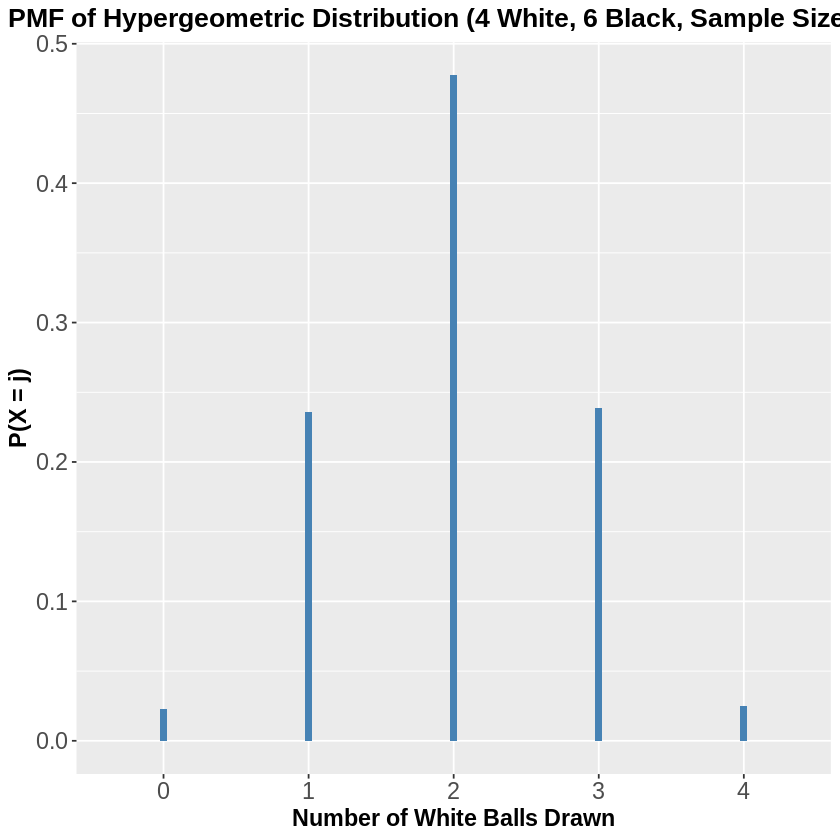

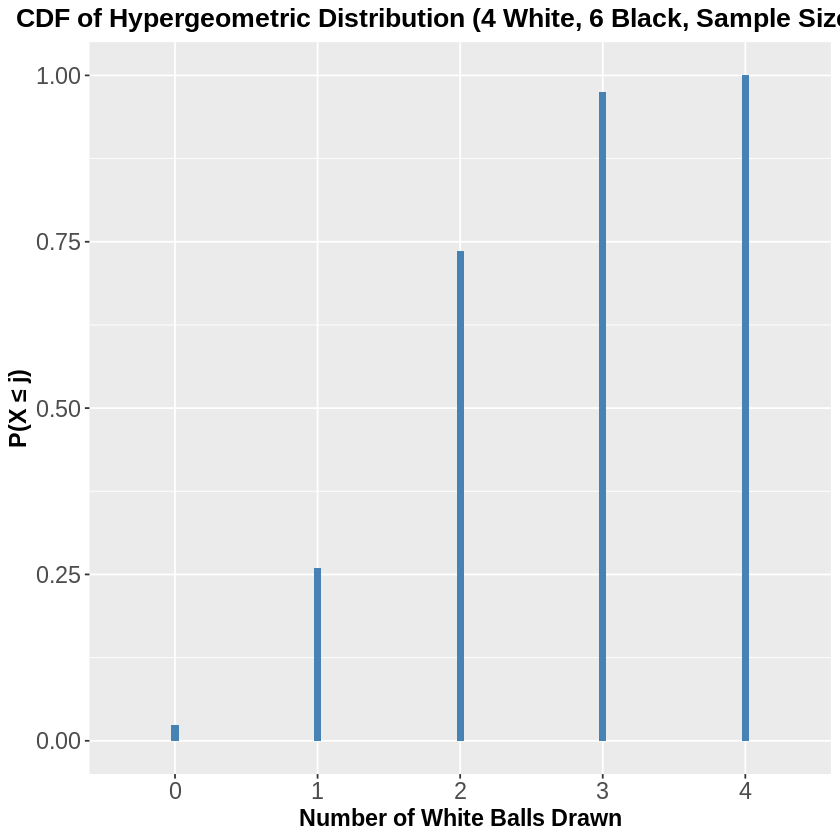

In [47]:
# Load necessary libraries
library(ggplot2)

# Parameters for the hypergeometric distribution
n_white = 4   # Number of white balls
n_black = 6   # Number of black balls
n_total = n_white + n_black  # Total number of balls
sample_size = 5  # Number of balls drawn

# Simulate hypergeometric random variable
nsimulations = 1e5  # Number of simulations
simulatedData = rhyper(nsimulations, n_white, n_black, sample_size)

# Convert simulatedData into a dataframe
dfHypergeo = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfHypergeo) = c('Values', 'Frequency')

# Add a new column with proportion (probability) values
dfHypergeo['Probability'] = dfHypergeo['Frequency'] / nsimulations

# Add a new column with the cumulative probabilities
dfHypergeo['Cumprob'] = cumsum(dfHypergeo['Probability'])

# Plot the PMF of the hypergeometric random variable using the simulated values
p_pmf = ggplot(data = dfHypergeo) +
  geom_bar(aes(x = Values, y = Probability), stat = "identity", width = 0.05, fill = 'steelblue') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 14, face = "bold")) +
  labs(x = 'Number of White Balls Drawn',
       y = 'P(X = j)',
       title = 'PMF of Hypergeometric Distribution (4 White, 6 Black, Sample Size = 5)')

# Display the PMF plot
print(p_pmf)

# Plot the CDF of the hypergeometric random variable using the simulated values
p_cdf = ggplot(data = dfHypergeo) +
  geom_bar(aes(x = Values, y = Cumprob), stat = "identity", width = 0.05, fill = 'steelblue') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 14, face = "bold")) +
  labs(x = 'Number of White Balls Drawn',
       y = 'P(X ≤ j)',
       title = 'CDF of Hypergeometric Distribution (4 White, 6 Black, Sample Size = 5)')

# Display the CDF plot
print(p_cdf)


---

How are the binomial and hypergeometric experiments related?

If $X\sim\text{HypGeom}(n_s, n_f, n)$ such that *both* the the following conditions hold:
1. sample size is much smaller than population size, $n << (n_s+n_f)$, and
2. number of successes $n_s$ is not close to  $0$ and population size $n_s+n_f.$

Then, $P(X = j)$ calculated using the hypergeometric PMF (or $\texttt{dhyper()}$) will result in approximately the same answer as calculating $P(X=j)$ using the binomial PMF (or $\texttt{dbinom()}$) where

$$X\sim\text{Bin}(n, p)\ \text{approximately where }p=n_s/(n_s+n_f).$$

---

In [48]:
# (1) Condition 1 "sample size is small compared to population size" satisfied
# (2) Condition 2 "success proportion is not too close to 0 or 1" not satisfied
dhyper(38, 9900, 100, 40) # X~HypGeom(ns = 9900, nf = 100, n= 40), P(X = 38)
dbinom(38, 40, 0.99) # X~Bin(n = 40, p = 0.99), P(X = 38)

# (1) Condition 1 "sample size is small compared to population size" not satisfied
# (2) Condition 2 "success proportion is not too close to 0 or 1" satisfied
dhyper(3600, 4000, 6000, 9000) # X~HypGeom(ns = 4000, nf = 6000, n = 9000), P(X = 3600)
dbinom(3600, 9000, 0.4) # X~Bin(n = 9000, p = 0.4), P(X = 3600)

# (1) Condition 1 "sample size is small compared to population size"  satisfied
# (2) Condition 2 "success proportion is not too close to 0 or 1" satisfied
dhyper(40, 4000, 6000, 100)
dbinom(40, 100, 0.4)

[1] 0.05307727

[1] 0.05323926

[1] 0.02713734

[1] 0.008583619

[1] 0.08162829

[1] 0.08121914

---

In a forest that has 1000 tigers, 250 are captured, tagged, and released. A few weeks later, a sample of 10 tigers from the forest is captured. Calculate the
probability that

- exactly half of those captured tigers are tagged: $$X\sim\text{HypGeom}(n_s = 250, n_f = 750, n = 10)\ \text{and we want }P(X = 5).$$
- at most half of those captured tigers are tagged
- at least half of those captured tigers are tagged

---

In [50]:
j = 5
n_s = 250
n_f = 750
n = 10
dhyper(j, n_s, n_f, n) # P(X = j) using X~HypGeom(n_s = 250, n_f = 750, n = 10)
dbinom(j, n, n_s/(n_s+n_f)) # P(X = j) using X~Bin(n = 10, p = n_s/(n_s+n_f))

# P(X <= 5)
phyper(j, n_s, n_f, n)

# P(X >= 5) = 1 - P(X < 5) = 1 - P(X <= 4)
1-phyper(j, n_s, n_f, n)

[1] 0.05790728

[1] 0.0583992

[1] 0.9808067

[1] 0.01919333

---

$\color{red}{\textbf{Complete this}}$

$\color{orange}{\textbf{How to estimate the population count of tigers in a population?}}$

Capture a few tigers, say 20, of them, and tag them. Release the tigers back into the forest and let the tigers in the forest to move around and to distribute themselves naturally. Come back after a few weeks and recapture a few tigers; say 10 of them. Suppose of those 10 that were recaptured, you found 4 of them to be tagged.

In this context, let the population count of tigers in the forest be $N,$ which is the quantity we are tying to estimate. The number of tigers that were tagged by us originally is the number of successes $n_s=20.$ The number of untagged tigers in the forest, which is also the number of failures, is $n_f = N-20.$ The sample size of tigers that were recaptured is $n=10.$ The number of successes which is the number of tagged tiger among the ones we recaptured is a random value which we observed to take the value 4. That is $$\begin{align*}X&=\text{number of tagged tigers among the recaptured ones}\\\Rightarrow X&\sim\text{HypGeom}(n_s=20, n_f = N-20, n =10)\\\Rightarrow P(X=j)&=\dfrac{{n_s\choose j}{{N-n_s}\choose{n-j}}}{N\choose n}\\\Rightarrow P(X=4)&=\dfrac{{20\choose 4}{{N-20}\choose{10-4}}}{N\choose 10} = \frac{{20\choose 4}{{N-20}\choose{6}}}{N\choose 10} \end{align*}.$$
We can now estimate $N$ by choosing a value that maximizes the likelihood of what we observed: that is, maximize the probability of observing $4$ tagged tigers. This can be shown to happen for the value $$\begin{align*}N &= \frac{n_s\times n}{j} = \frac{20\times10}{4}=50.\end{align*}$$
The following code plots the likelihood value for different values of $N$ which can be observed to reach a maximum value for $N=50.$

---

In [ ]:
# No. of successes
n_s = ?

# Function to return number of failures for population size N
n_f = function(N){
  return(?)
  }

# Sample size
n = ?

# No. of observed successes in the sample
j = ?

# Likelihood function
L = function(N){
  return(choose(n_s, j)*choose(?, ?)/choose(?, ?)) # return(dhyper(j, n_s, n_f, n)) also works
}

# Plot likelihood function
N_values = 20:200
df = as.data.frame(cbind(N_values, L(N_values)))
colnames(df) = c('N_values', 'L')
p = ggplot(data = ?) +
  geom_point(aes(x = ?, y = ?), color = 'blue') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 14),
  axis.text.x = element_text(size = 12),
  axis.text.y = element_text(size = 12),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'N',
       y = 'Likelihood',
       title = 'Likelihood of Hypergeometric Random Variable')
p

$\color{red}{\textbf{Complete this}}$


---

**Example:** an oil company has the following record in the past: out of 10000 drilling attempts, it has struck oil 2000 times. What is the probability the company will strike oil 3 times in 7 drilling attempts?

$$X\sim\text{HypGeom}(n_s = ?, n_f = ?, n = ?)$$

and the probability we are interested in is $P(X=\,?).$

---

In [51]:
dhyper(3, 2000, 8000, 7)

[1] 0.1146708

$\color{red}{\textbf{Complete this}}$

---

A company has a pool of 15 applicants (10 male, 5 female) for a particular position that has 3 current openings. Calculate the probability that none of the
positions are filled by males.

$$X\sim\text{HypGeom}(n_s = ?, n_f = ?, n = ?)$$

and the probability we are interested in is $P(X=\,?).$

---

In [52]:
dhyper(3, 5, 10, 3)

[1] 0.02197802

$\color{red}{\textbf{Complete this}}$

---

**Example:** an assembly line produces products that they put into boxes of 50. The inspector then randomly picks 3 items inside a box to test to see if they are defective. In a box containing 4 defectives, they are interested in the probability that at least one of the three items sampled is defective.

$$X\sim\text{Hyper}(n_s = ?, n_f = ?, n = ?)$$

and the probability we are interested is need $P(X \geq\,?).$

---

In [56]:
ns = 4
nf = 46
n = 3

1 - phyper(0, ns, nf, n)

[1] 0.2255102

$\color{red}{\textbf{Complete this}}$

---

**Example:** an assembly line produces products that they put into boxes of 50. The inspector then randomly picks 3 items inside a box to test to see if they are defective. In a box containing 4 defectives, they are interested in the probability that at most one of the three items sampled is defective.

We need $$ P(X \leq 1),$$ where $$X\sim\text{Hyper}(n_s = ?, n_f = ?, n = ?).$$


---

In [55]:
ns = 4
nf = 46
n = 3

phyper(1, ns, nf, n)


[1] 0.9857143

---


$\color{orange}{Negative\ Binomial\ Experiment}$


**Scenario**: a box has 4 white and 6 black balls. We randomly draw balls $\color{green}{with\ replacement}.$ We are interested in the probability that 4th white ball will be drawn in the 10th attempt. This is the $\color{green}{negative\ binomial\ experiment}.$

---

In [20]:
## Sampling space
s = c('w', 'b')

## Probability for sampling an element from the sampling space
p = c(4/10, 6/10)

## Simulate the random experiment of drawing 10 balls with replacement
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 10, replace = TRUE, prob = p))

## Check event if 4th white ball is drawn in the 10th attempt
checkEvent = function(data){
  if ((sum(data == 'w') == 4) & (data[10] == 'w')){
    return(1)
  }
  else{
    return(0)
  }
}

## Calculate probability that the 4th white ball is drawn in the 10th attempt
#simulatedData
mean(apply(simulatedData, 2, checkEvent))
dnbinom(10-4, 4, 0.4) # p = 0.4, r = 4
# The probability that "we get the 4th success in the 10th attempt with a
# success probability per trail of 0.4" is equivalent to the probability that
# "we have 10-4 failures before the 4th sucess with a sucess probability
# of 0.4 per trial."


[1] 0.100092

[1] 0.1003291

---
$\color{red}{\textbf{Complete this}}$

Simulating a negative binomial random variable and plotting its PDF and CDF using the simulated values

---

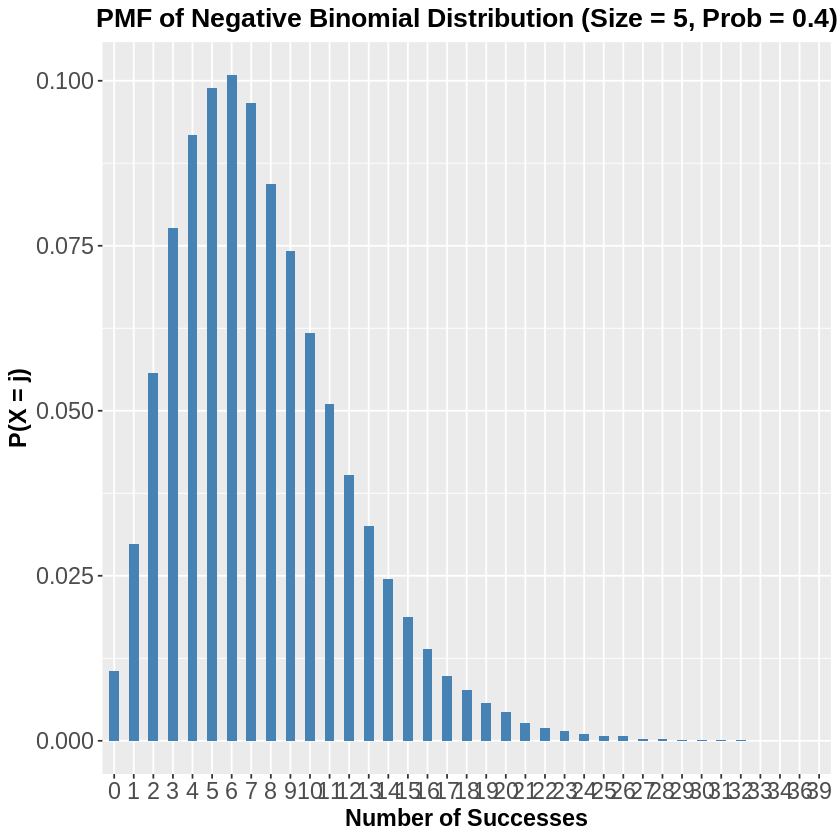

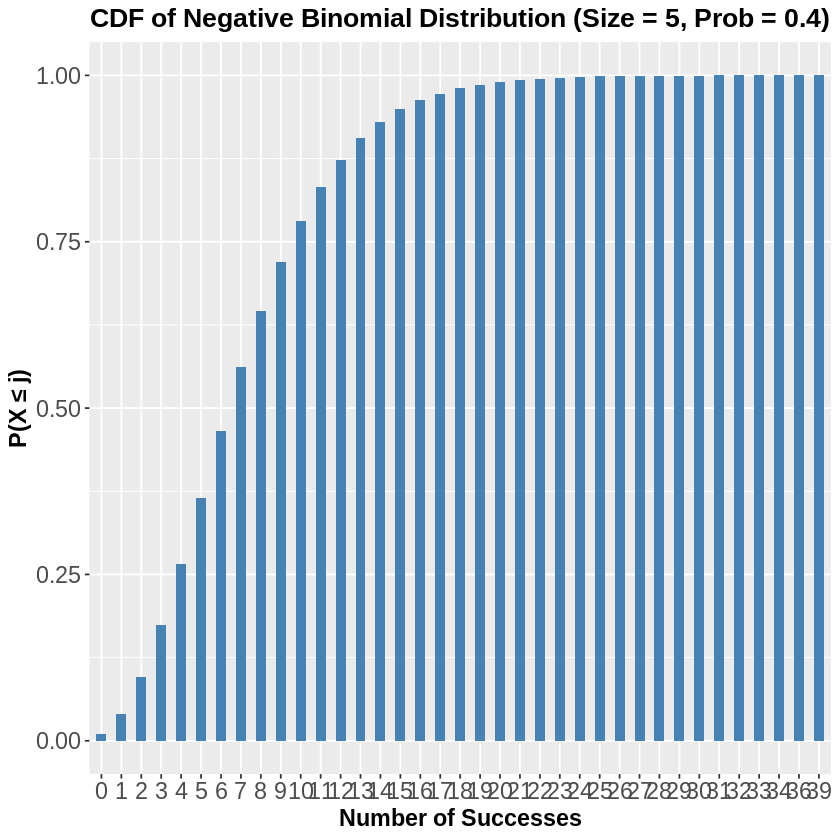

In [62]:
# Load necessary libraries
library(ggplot2)

# Parameters for the negative binomial distribution
size = 5      # number of failures (successes to be achieved)
prob = 0.4    # probability of success
nsimulations = 1e5  # Number of simulations

# Simulate negative binomial random variable
simulatedData = rnbinom(nsimulations, size = size, prob = prob)

# Convert simulatedData into a dataframe
dfNegBinom = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfNegBinom) = c('Values', 'Frequency')

# Add a new column with proportion (probability) values
dfNegBinom['Probability'] = dfNegBinom['Frequency'] / nsimulations

# Add a new column with the cumulative probabilities
dfNegBinom['Cumprob'] = cumsum(dfNegBinom['Probability'])

# Plot the PMF of the negative binomial random variable using the simulated values
p_pmf = ggplot(data = dfNegBinom) +
  geom_bar(aes(x = Values, y = Probability), stat = "identity", width = 0.5, fill = 'steelblue') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 14, face = "bold")) +
  labs(x = 'Number of Successes',
       y = 'P(X = j)',
       title = 'PMF of Negative Binomial Distribution (Size = 5, Prob = 0.4)')

# Display the PMF plot
print(p_pmf)

# Plot the CDF of the negative binomial random variable using the simulated values
p_cdf = ggplot(data = dfNegBinom) +
  geom_bar(aes(x = Values, y = Cumprob), stat = "identity", width = 0.5, fill = 'steelblue') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title = element_text(size = 14, face = "bold")) +
  labs(x = 'Number of Successes',
       y = 'P(X ≤ j)',
       title = 'CDF of Negative Binomial Distribution (Size = 5, Prob = 0.4)')

# Display the CDF plot
print(p_cdf)


---

**Example:** an oil company has a $20\%$ chance of striking oil when drilling a well. What is the probability the company drills $7$ times to strike oil the 3rd time?

$$X\sim\text{NegBin}(r = 3, p = 0.2)$$ and we are interested in $P(X=7).$

---

In [17]:
r = 3
p = 0.2
j = 7
dnbinom(j-r, r, p) # dbinom(j, n, p)
choose(j-1, r-1)*(p^r)*(1-p)^(j-r)

[1] 0.049152

[1] 0.049152

$\color{red}{\textbf{Complete this}}$

---
  
**Example:** a person conducting telephone surveys must get 4 more completed surveys before their job is finished. On each randomly dialed number, there is a 90% chance of the participant rejecting the call. What is the probability that the person will finish their job at the 10th call?

$$X\sim\text{NegBin}(r = ?, p = ?)$$

and we are interested in $P(X = \,?).$
  
---

In [18]:
r = 4
p = 0.9
j = 10
dnbinom(j-r, r, p)

[1] 5.51124e-05

$\color{red}{\textbf{Complete this}}$

---

**Example**: at an airport, it is know that approximately 2 out of 10 passengers have a metallic object. If left undetected at the manual security check at the airport entrance,  such a metallic object will raise an alarm when the passenger walks through an automated screening machine. It is considered a security breach when the alarm gets raised 20 times a day. What is the probability of a security breach on a particular day when the 100th passenger walks through the automated screening machine?

$$X\sim\text{NegBin}(r = ?, p = ?)$$

and we are interested in $P(X=\,?).$

---

In [19]:
r = 20
p = 0.2
j = 100
dnbinom(j-r, r, p)

[1] 0.01986004

---

$\color{orange}{Poisson\ Random\ Variable}$

The Poisson random variable is an extreme case of the binomial random variable when the number of trials $n$ far exceeds the success probability per trail:

$$X\sim\text{Bin}(n,p)\ \text{with } n>>p\Rightarrow X\sim\text{Poi}\left(\underbrace{\lambda}_{n\times p}\right),$$ where $\lambda = n\times p$ can be considered as the average rate of occurence of the event. The probability mass function (PMF) of the Poisson random variable is $$P(X = j) = \dfrac{e^{-\lambda}\lambda^j}{j!},\ \text{where }j=0,1,2,\ldots.$$

**Example**: On an average, 3.5 accidents occur on a road every month. What is the probability that (a) in the next month, there are 4 accidents (2) in the next two months, there are 8 accidents.

---

In [28]:
lambda = 3.5
j = 4
dpois(j, lambda)

lambda = 2*3.5
j = 8
dpois(j, lambda)

[1] 0.1888123

[1] 0.1303774

---

$\color{red}{\textbf{Complete this}}$

On an average, a laptop crashes once every 5000 hours. What is the probability that 10 laptops will crash the next calendar year?

$$X\sim\text{Poi}\left(\lambda = 1\frac{\text{crash}}{\text{5000 hours}}\right)$$

---

In [27]:
lambda = 365*24/5000
j = 10
dpois(j, lambda)

[1] 1.302249e-05

---

$\color{red}{\textbf{Complete this}}$

Consider a computer cluster (data center) of 100 web servers, where incoming requests are
randomly assigned to servers with equal probability. Based on historical averages, each
server in the data center receives requests at a rate of 3 per second. Some buggy server code
was just deployed to all the servers in the cluster and as a result any server will crash if it
receives more than 8 requests in a second. What is the approximate probability that no
servers have crashed 1 second after the buggy code is deployed?

Let $X_i$ be the random number of requests that the $i$th server gets. We have $X_i\sim\text{Poi}\left(\lambda = 3\,\frac{\text{requests}}{\text{second}}\right).$

Probability of interest = $P(X_1 \leq 8\,\text{AND}\,X_2\leq 8\,\text{AND}\,\ldots\,\text{AND}\, X_{100}\leq 8)= P(X_1\leq 8)\times P(X_2\leq8)\times\cdots\times P(X_{100}\leq8).$

---

In [34]:
lambda = 3
n_servers = 100
j = 8
ppois(j, lambda)
ppois(j, lambda)^100


[1] 0.996197

[1] 0.6831614

---

$\color{red}{\textbf{Complete this}}$

The number of times that a person contracts a cold in a given year is a Poisson random variable with parameter $\lambda=5.$  Suppose that a new wonder drug (based on large quantities of vitamin C) has just been marketed that reduces the Poisson parameter to $\lambda=2$ for 70 percent of the population. For the remaining population, the drug has no appreciable effect on colds.

1. As a member of a pharmaceutical decision making body, you are interested in knowing how likely is it that the drug is beneficial for an individual if he/she tries the drug for a year and has $1$ cold in that time. Calculate this probability. **Hint**: apply Bayes' theorem to $P(\text{Drug beneficial}\ |\ \text{1 cold}).$
2. You will approve the drug for production if 10 people who tried the drug for a year and have 1 cold in that time each, the probability that the drug is beneficial for at least 8 of them is greater than 98%. Will you approve the drug or not?

---

In [63]:
# #1
# lambda = 2 #colds/year
# #bayes theorem :
# #drugs beneficial = 2colds/year, not beneficial= 5colds/year
# j =
# dpois()

# Define probabilities
P_A = 0.7          # Probability drug is beneficial
P_Ac = 0.3        # Probability drug is not beneficial

# Calculate P(B | A) and P(B | A^c) using dpois
P_B_given_A = dpois(1, lambda = 2)     # Poisson with lambda = 2
P_B_given_Ac = dpois(1, lambda = 5)    # Poisson with lambda = 5

# Calculate P(B)
P_B = (P_B_given_A * P_A) + (P_B_given_Ac * P_Ac)

# Calculate P(A | B)
P_A_given_B = (P_B_given_A * P_A) / P_B

# Display P(A | B)
P_A_given_B

# Now check if we approve the drug for at least 8 out of 10
n = 10  # number of trials
k = 8   # threshold for approval

# Calculate P(X >= 8) using the binomial distribution
P_X_geq_8 = 1 - pbinom(k - 1, size = n, prob = P_A_given_B)

# Display P(X >= 8)
P_X_geq_8

[1] 0.9493581

[1] 0.9880888

---

$\color{red}{\textbf{Complete this}}$

Suppose a random number of $K$ customers shop at a supermarket in a day. Let $X_1,X_2,\ldots,X_K$ represent the random number of items purchased independently by the $1$st, $2$nd, $\ldots,$ $K$th customer. The total number of items sold in a day is a random number $Y$ such that: $$ Y = X_1+X_2+\cdots+X_K.$$ Suppose that $30$ customers visit the supermarket on an average per day and that each customer buys on an average 3 items.

If you are the supermarket owner and want to increase the *expected* total number of items sold in a day. You have two options: (a) increase the *expected* number of customers by $10\%$ by spending on external advertisement (b) increase the *expected* number of items purchased by each cutomer by $10\%$ by spending on internal (in-shop) advertisement.
1. Do both options result in an increase in the expected total number of items sold in a day?
2. Which option results in the greatest increase in the expected total number of items sold in a day?
3. Which option is least risky? **Hint**: standard deviation
4. For each option, plot a bar plot showing the distribution of the total number of items sold in a day.

---

In [ ]:
nsimulations = 100
K = ?
Y = rep(NA, ?)

for (i in 1:length(?)){
  if (? != 0){
    Y[i] = ?
      }
    }
  }

# Expected number of items sold in a day
?(?)

# Standard deviation of items sold in a day
?(?)

$\color{red}{\textbf{Complete this}}$

---

The following questions are designed to test your understanding of which discrete random variable you would use for the modeling and calculation purposes:

1. Suppose a production line has a 20% defective rate.
- What is the probability that the first defective will occur in the 5th inspection?
- What is the probability that it will take more than 10 inspections to identify the first defective?
- Suppose that the first 10 inspections have been found to be free of defectives. What is the probability that the first defective will occur during the 15th inspection? **Hint**: apply Bayes’ theorem to $P(X = 15\,|\,X > 10).$
2. Microprocessors for an electronic device are procured from two factories $A$ and $B$ and sent as a single shipment. 70% of the microprocessors come from $A$ and the remaining from $B.$ Suppose that a microprocessor manufactured in $A$ is twice as likely to be defective as one manufactured in $B.$ A shipment containing 10,000 microprocessors arrives of which 200 are found to be defective. Approximately how many defective microprocessors from this shipment can be attributed to $A?$

$\color{red}{\textbf{Complete this}}$


---

This is an exercise on simulating a generic random variable like the salesman's earnings random variable:

To determine whether they have bird flu, 50 people have their blood tested. However, rather than testing each individual separately, it is decided to first place the people into groups of 5. The blood samples of the 5 people in each group will be pooled and analyzed together. If the test is negative, one test will suffice for the 5 people, whereas if the test is positive, each of the 5 people will also be individually tested and, in all, 6 tests will be
made on this group. Note that we assume that the pooled test will be positive if at least one person in the pool has bird flu. Assume that the probability that a person has bird flu is 15% for all people, independently of each other.

Let $X$ be the random variable representing the number of tests required for a random group of 5 people.

- What are the values that $X$ can take?
- Calculate the associated probabilities using simulation and confirm your answers with pen & paper probabilities.
- Compute the expected number of tests for a random group of 5 people if we adopt the testing strategy proposed above using simulation first and then confirm your answer using pen & paper.

---